In [3]:
import os
import pandas as pd
import folium
import geopandas as gpd
import fiona
from fiona.crs import from_epsg
from folium.plugins import MarkerCluster


In [69]:
os.listdir('./_datasets/')

['acidentes2013.csv',
 'acidentes2010.csv',
 'acidentes2018.csv',
 'acidentes2014.csv',
 'acidentes2008.csv',
 'acidentes2016.csv',
 'acidentes2007.csv',
 'acidentes2009.csv',
 'acidentes2012.csv',
 'acidentes2011.csv',
 'acidentes2017.csv',
 'acidentes2015.csv']

In [4]:
df = spark.read.csv('./_datasets/acidentes2018.csv', header=True, sep=';')

In [71]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- pesid: string (nullable = true)
 |-- data_inversa: string (nullable = true)
 |-- dia_semana: string (nullable = true)
 |-- horario: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- br: string (nullable = true)
 |-- km: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- causa_acidente: string (nullable = true)
 |-- tipo_acidente: string (nullable = true)
 |-- classificacao_acidente: string (nullable = true)
 |-- fase_dia: string (nullable = true)
 |-- sentido_via: string (nullable = true)
 |-- condicao_metereologica: string (nullable = true)
 |-- tipo_pista: string (nullable = true)
 |-- tracado_via: string (nullable = true)
 |-- uso_solo: string (nullable = true)
 |-- id_veiculo: string (nullable = true)
 |-- tipo_veiculo: string (nullable = true)
 |-- marca: string (nullable = true)
 |-- ano_fabricacao_veiculo: string (nullable = true)
 |-- tipo_envolvido: string (nullable = true)
 |-- estado_fisico: string

In [72]:
df.limit(5).toPandas()

id   pesid data_inversa     dia_semana   horario  uf   br     km  \
0  99973  216524   2018-01-01  segunda-feira  00:20:00  RJ  116  303,5   
1  99973  216530   2018-01-01  segunda-feira  00:20:00  RJ  116  303,5   
2  99973  216523   2018-01-01  segunda-feira  00:20:00  RJ  116  303,5   
3  99973  216527   2018-01-01  segunda-feira  00:20:00  RJ  116  303,5   
4  99973  216532   2018-01-01  segunda-feira  00:20:00  RJ  116  303,5   

                                           municipio  \
0  RESENDE                                       ...   
1  RESENDE                                       ...   
2  RESENDE                                       ...   
3  RESENDE                                       ...   
4  RESENDE                                       ...   

                                      causa_acidente  \
0  Condutor Dormindo                             ...   
1  Condutor Dormindo                             ...   
2  Condutor Dormindo                             ...   
3  Condutor Dormindo                             ...   
4  Condutor Dormindo                             ...   

                ...                                sexo ilesos feridos_leves  \
0               ...                Feminino                  0             0   
1               ...                Masculino                 0             0   
2               ...                Masculino                 0             0   
3               ...                Feminino                  0             0   
4               ...                Masculino                 1             0   

  feridos_graves mortos   latitude  longitude              regional  \
0              1      0  -22.46937  -44.44705  SR-RJ                  
1              1      0  -22.46937  -44.44705  SR-RJ                  
2              1      0  -22.46937  -44.44705  SR-RJ                  
3              1      0  -22.46937  -44.44705  SR-RJ                  
4              0      0  -22.46937  -44.44705  SR-RJ                  

                        delegacia                             uop  
0  DEL5/7                          UOP03/RJ                        
1  DEL5/7                          UOP03/RJ                        
2  DEL5/7                          UOP03/RJ                        
3  DEL5/7                          UOP03/RJ                        
4  DEL5/7                          UOP03/RJ                        

[5 rows x 35 columns]

In [73]:
df_ = df.groupby('dia_semana').count().toPandas()

In [74]:
df_.sort_values(by=['count'])

dia_semana  count
4    ter�a-feira  16935
0   quarta-feira  17031
6   quinta-feira  17067
2  segunda-feira  18411
3    sexta-feira  21065
1         s�bado  22294
5        domingo  22650

In [75]:
df_ = df.groupby('uf').count().toPandas()

In [76]:
df_.sort_values(by=['count'])

uf  count
3   AM    279
26  AP    432
4   RR    500
23  AC    517
17  SE   1056
6   TO   1282
13  AL   1305
24  DF   1831
22  MA   2661
20  RN   2725
15  PA   2765
2   PI   2779
12  MS   3038
9   PB   3062
19  CE   3328
1   RO   3405
7   MT   4806
10  ES   5065
18  PE   5186
5   GO   6784
16  BA   7399
8   SP   8482
21  RJ   8706
11  RS   8988
25  PR  15120
0   SC  16031
14  MG  17921

In [77]:
df_ = df.groupby('br').count().toPandas()

In [78]:
df_.sort_values(by=['count'])

br  count
93   342      1
48   486      1
100  426      2
60   436      2
3    475      4
71   122      5
1    451      5
59   403      5
80   377      5
2    447      8
73   482      8
27   425     10
22    30     11
74   416     13
41   359     16
16   419     20
12   495     34
34   410     34
61   412     37
56   429     45
23   432     46
39   421     53
96   420     60
105  487     62
112  330     63
32   488     67
8    448     67
15   361     68
10   317     77
102  469     79
..   ...    ...
97   386   1030
66   135   1248
26   365   1284
29   343   1298
49   290   1423
84   158   1447
111   50   1455
110  324   1484
63   369   1504
7    232   1583
98   222   1609
57   280   1629
43   476   1677
91    20   1937
42    70   1991
53    60   2172
50   230   2688
6    282   3070
81   316   3310
4    470   3541
106  262   3634
76   277   3816
64   376   3984
40   163   4227
45   364   4877
78   153   5622
62    40   6234
47   381   6793
89   116  18676
13   101  21220

[113 rows x 2 columns]

In [13]:
map_osm = folium.Map(location=[-23.533773,-46.625290], tiles='openstreetmap',
                   zoom_start=5.75, control_scale=True)

In [9]:
map_osm.

### path = '/home/luancmenezes/Documents/Projetos/Shapefiles/ST_DNIT_Rodovias_SNV2015_03.shp'

In [11]:
data = gpd.read_file(path)

In [12]:
data.plot()
plt.show()

NameError: name 'plt' is not defined

In [8]:
data.head()

id   br  uf      codigo                   local_de_i          local_de_f  \
0   773   10  PA  010BPA0790  ENTR PA-136/320 (CASTANHAL)  ACESSO AMERICANO I   
1   775  458  MG  458BMG0020             CONSELHEIRO PENA         CUITÉ VELHO   
2   349  450  DF  450BDF0230                  ENTR DF-055  ENTR DF-065 (EPIP)   
3   354  427  RN  427BRN0120               ENTR RN-118(A)      ENTR RN-118(B)   
4  1257  259  MG  259BMG0220        DIVINOLÂNDIA DE MINAS        VIRGINÓPOLIS   

   km_inicial  km_final  extensao superficie  federal_co  federal__1  \
0       393.4     407.0      13.0        DUP  308BPA0100  316BPA0100   
1         4.0      35.0      31.0        PLA        None        None   
2        24.8      33.5       8.7        PLA        None        None   
3        96.4     112.2      15.0        PAV        None        None   
4       278.3     291.6      13.0        PLA        None        None   

  federal__2 estadual_c superfic_1 mpv_082_20 concessao_  \
0       None       None       None       None       None   
1       None    MGT-458        PAV       None       None   
2       None     DF-003        DUP       None       None   
3       None       None       None       None       None   
4       None    MGT-259        PAV       None       None   

                                            geometry  
0  LINESTRING (-47.93216715399996 -1.296987532999...  
1  LINESTRING (-41.46061333799992 -19.16888101499...  
2  LINESTRING (-47.95917946399993 -15.87796352899...  
3  LINESTRING (-37.06439269199996 -6.481185631999...  
4  LINESTRING (-42.61177814099995 -18.79839874499...

In [83]:
data.crs = from_epsg(4326)

In [84]:
data['geometry'] = data['geometry'].to_crs(epsg=4326)

In [85]:
data['geoid'] = data.index.astype(str)

In [86]:
data = data[['geoid', 'br', 'geometry']]


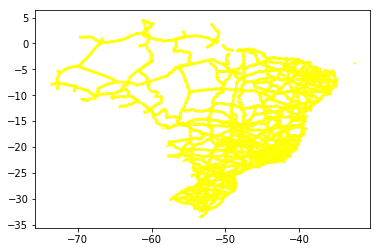

In [111]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)
# for line in data['geometry']:
#     print (line)
#     break
gpd.plotting.plot_linestring_collection(ax, data['geometry'], color='yellow', linewidth=3)
plt.show()

In [20]:
data

geoid   br                                           geometry
0        0   10  LINESTRING (-47.93216715399996 -1.296987532999...
1        1  458  LINESTRING (-41.46061333799992 -19.16888101499...
2        2  450  LINESTRING (-47.95917946399993 -15.87796352899...
3        3  427  LINESTRING (-37.06439269199996 -6.481185631999...
4        4  259  LINESTRING (-42.61177814099995 -18.79839874499...
5        5  324  LINESTRING (-38.46138420699992 -12.70878938999...
6        6  364  LINESTRING (-60.01040264399995 -12.97684575999...
7        7  364  LINESTRING (-53.32244486999991 -17.23383796699...
8        8  163  LINESTRING (-55.41049385899993 -15.81989305099...
9        9  262  LINESTRING (-57.02765845899995 -19.64873798699...
10      10  222  LINESTRING (-47.53178140099993 -4.443800673999...
11      11  381  LINESTRING (-40.39940271199993 -18.71003350599...
12      12  364  LINESTRING (-67.91073888299991 -9.870813569999...
13      13  432  LINESTRING (-60.61578331099992 2.1117675870000...
14      14  417  LINESTRING (-49.93975915399994 -1.017872214999...
15      15   50  LINESTRING (-47.89295936499992 -20.75203083099...
16      16  116  LINESTRING (-44.81653067999992 -22.55385274199...
17      17  174  LINESTRING (-60.83242026499995 3.1385016270000...
18      18  374  LINESTRING (-48.53237190299996 -23.07283758399...
19      19   70  LINESTRING (-53.2443077609999 -15.593560410999...
20      20  163  LINESTRING (-54.69389010199995 -22.82262731999...
21      21  494  LINESTRING (-44.29476315099993 -21.74449173499...
22      22  451  LINESTRING (-42.87255202099993 -17.87307124199...
23      23  369  LINESTRING (-52.97513226899991 -24.55492508299...
24      24  101  LINESTRING (-43.81008222999992 -22.87277527799...
25      25  116  LINESTRING (-38.99758587099996 -11.48889841599...
26      26  265  LINESTRING (-47.87216035299991 -20.91956874799...
27      27  381  LINESTRING (-45.33596116399991 -21.67340219699...
28      28   70  LINESTRING (-57.73848273199992 -16.01306844399...
29      29  430  LINESTRING (-44.94690553999993 -12.14079424399...
...    ...  ...                                                ...
6462  6462  146  LINESTRING (-46.61657314699994 -21.12719457799...
6463  6463  459  LINESTRING (-46.54211622499992 -21.78788619899...
6464  6464  146  LINESTRING (-46.4042251379999 -21.745630110999...
6465  6465  122  LINESTRING (-43.67463477299992 -16.34168973999...
6466  6466  265  LINESTRING (-47.07066166599992 -20.97230199399...
6467  6467  462  LINESTRING (-47.29417241899995 -19.34428258899...
6468  6468  381  LINESTRING (-44.49906561999995 -20.39415987999...
6469  6469  474  LINESTRING (-41.71626327699994 -19.80131534499...
6470  6470  422  LINESTRING (-49.67086813899994 -3.767299675999...
6471  6471  476  LINESTRING (-49.3109562379999 -25.540531304999...
6472  6472  376  LINESTRING (-51.22861864299995 -23.89359215099...
6473  6473  404  LINESTRING (-41.44723451099992 -4.438229298999...
6474  6474  407  LINESTRING (-41.44723451099992 -4.438229298999...
6475  6475  304  LINESTRING (-35.85931788699992 -5.767577675999...
6476  6476  407  LINESTRING (-41.43325551099991 -7.079332781999...
6477  6477  406  LINESTRING (-36.45228571299992 -5.214755195999...
6478  6478  226  LINESTRING (-36.11456472199995 -6.179044583999...
6479  6479  283  LINESTRING (-53.00564800299992 -27.08451892299...
6480  6480  101  LINESTRING (-35.23407896199996 -6.077912814999...
6481  6481  153  LINESTRING (-51.91819255899992 -27.18111158099...
6482  6482  101  LINESTRING (-48.63085460899993 -27.82072726699...
6483  6483  285  LINESTRING (-49.60054762699991 -29.02652140099...
6484  6484  283  LINESTRING (-51.19218967499995 -27.39339315799...
6485  6485  153  LINESTRING (-48.23478423899991 -7.193262327999...
6486  6486  153  LINESTRING (-48.50833888499995 -8.862247535999...
6487  6487   10  LINESTRING (-47.75484207499994 -11.61898668199...
6488  6488  435  LINESTRING (-60.54495590699992 -13.13156620799...
6489  6489  163  LINESTRING (-54.81080335999991 -2.6

In [87]:
jsontxt = data.to_json()

In [22]:
# Create a Clustered map where points are clustered
marker_cluster = MarkerCluster().add_to(map_osm)

In [88]:
map_osm.choropleth(data,geo_str=jsontxt,columns=['geoid', 'br'],
                   fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.2, line_color='white', line_weight=0,
                   threshold_scale=[100, 250, 500, 1000, 2000],
                   highlight=False, smooth_factor=1.0)

/usr/local/lib/python3.5/dist-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [116]:
map_osm.display()

AttributeError: 'Map' object has no attribute 'display'

folium.LinearColormap('blue_clear_red',data['geometry'])

In [55]:
for idx, row in data.iterrows():
    # Get lat and lon of points
    lon = row['geometry']
    lat = row['geometry']

    # Get address information
    address = row['br']
    # Add marker to the map
    print (row)
#     print(row['geometry'][idx])
    folium.RegularPolygonMarker(row['geometry'][idx], popup=address, fill_color='#2b8cbe', number_of_sides=6, radius=8).add_to(marker_cluster)

geoid                                                       0
br                                                         10
geometry    LINESTRING (-47.93216715399996 -1.296987532999...
Name: 0, dtype: object


TypeError: 'LineString' object does not support indexing

In [24]:
outfp = r'./pop15.html'
map_osm.save(outfp)

In [125]:
import folium
import numpy as np
import pandas as pd
from collections import namedtuple
from shapely.geometry import Point, LineString
# using omaha coordinates 
center_lat = 41.257160
center_lon = -95.995102
# generating a couple of random latlongs in the omaha area
lats = np.random.uniform(low=center_lat - .25, high=center_lat +    .25, size=(2,))
lons = np.random.uniform(low=center_lon - .25, high=center_lon + .25, size=(2,))
p1 = [lats[0], lons[0]]
p2 = [lats[1], lons[1]]

In [138]:
data.apply(lambda x: LineString(x['geometry']))

KeyError: ('geometry', 'occurred at index geoid')

In [146]:
print(str(data.loc[0]['geometry']))

LINESTRING (-47.93216715399996 -1.296987532999936, -47.93219711699993 -1.296989740999948, -47.93232243499995 -1.296999045999939, -47.93244807299993 -1.297006755999917, -47.93257517899991 -1.297014179999906, -47.93270273799993 -1.297021903999962, -47.93282938999994 -1.297028913999952, -47.93295449499993 -1.297035183999924, -47.93307757099996 -1.297041260999947, -47.93319669999994 -1.29704789099992, -47.93331001099995 -1.297055047999947, -47.93341985499995 -1.297061450999934, -47.93352481499994 -1.297068687999911, -47.93362227899991 -1.297076665999953, -47.93371397999994 -1.297085082999956, -47.93380042399991 -1.297093453999935, -47.93388118599995 -1.297100677999936, -47.93395452999994 -1.297105793999947, -47.93402237899994 -1.29711601899993, -47.93408179599993 -1.297121414999936, -47.93413398299992 -1.297123275999922, -47.93417656499992 -1.297126730999935, -47.9342139979999 -1.297129372999962, -47.93425009599991 -1.297131633999925, -47.93429177099995 -1.297133974999952, -47.934358071999

In [133]:
data['geometry'].apply(lambda x:x.tolist())

AttributeError: 'LineString' object has no attribute 'tolist'

In [132]:
LineString.tok

shapely.geometry.linestring.LineString